# MSCA 31010 Assignment 3
# Sijie Li

In [737]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from scipy.special import loggamma
from scipy.stats import norm

sys.path.append(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear')
import Regression

from scipy.stats import chi2

In [744]:
# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)
pandas.options.display.float_format = '{:,.4}'.format

# Data Manipulation

In [578]:
#Import data
Telco = pd.read_csv(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear\Wk6\Telco-Customer-Churn.csv')
Telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,2.9850000e+01,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,5.6950000e+01,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,5.3850000e+01,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),4.2300000e+01,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,7.0700000e+01,151.65,Yes


<AxesSubplot:>

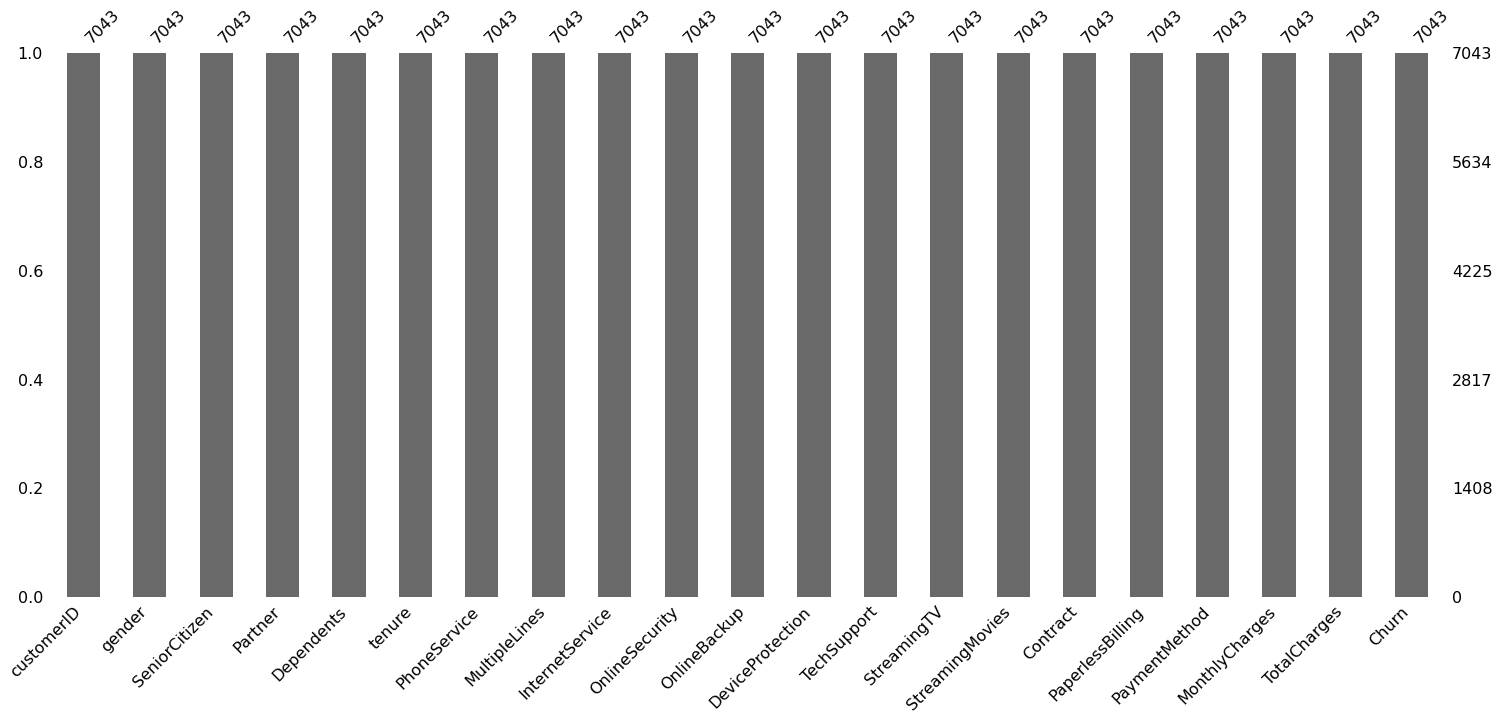

In [1053]:
#Check missing value
import missingno as msno
msno.bar(Telco)

In [1054]:
# Split into predictor and response dataframes.

Telco.X = Telco.drop('Churn', axis=1)
Telco.y = Telco['Churn']

Telco.X.shape,Telco.y.shape

<ipython-input-1054-3420df8674fd>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Telco.X = Telco.drop('Churn', axis=1)
<ipython-input-1054-3420df8674fd>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Telco.y = Telco['Churn']


((7043, 20), (7043,))

In [1055]:
# Map response variable to integers 0,1.

Telco.y = pd.Series(np.where(Telco.y.values == 'Yes',1,0), Telco.y.index)

In [1056]:
Telco.y.value_counts()

0    5174
1    1869
dtype: int64

In [1057]:
# Separating with continuous and categorical variables.

X_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract', 'PaperlessBilling']
X_cont = ['MonthlyCharges', 'TotalCharges', 'tenure']


In [1058]:
Y_name = ['Churn']

In [1059]:
# Create the training data
trainData = Telco[Y_name + X_cat + X_cont].dropna()

In [1060]:
trainData

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,tenure
0,No,Female,0,Yes,No,No,No phone service,Month-to-month,Yes,29.85,29.85,1
1,No,Male,0,No,No,Yes,No,One year,No,56.95,1889.5,34
2,Yes,Male,0,No,No,Yes,No,Month-to-month,Yes,53.85,108.15,2
3,No,Male,0,No,No,No,No phone service,One year,No,42.3,1840.75,45
4,Yes,Female,0,No,No,Yes,No,Month-to-month,Yes,70.7,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Male,0,Yes,Yes,Yes,Yes,One year,Yes,84.8,1990.5,24
7039,No,Female,0,Yes,Yes,Yes,Yes,One year,Yes,103.2,7362.9,72
7040,No,Female,0,Yes,Yes,No,No phone service,Month-to-month,Yes,29.6,346.45,11
7041,Yes,Male,1,Yes,No,Yes,Yes,Month-to-month,Yes,74.4,306.6,4


# Question 1 a) 

a) For each categorical predictor, generate a bar chart that shows the odds of Churn for each category.  Please order the categories in ascending odds of Churn.  Also, please comment on each categorical predictor on whether it may affect the target variable.

In [1061]:
X_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling']

In [1062]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

## Gender

In [1063]:
pred = 'gender'
pred

'gender'

In [1064]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: category
Categories (2, object): ['Female', 'Male']

In [1065]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
gender,,
Female,2549,939
Male,2625,930


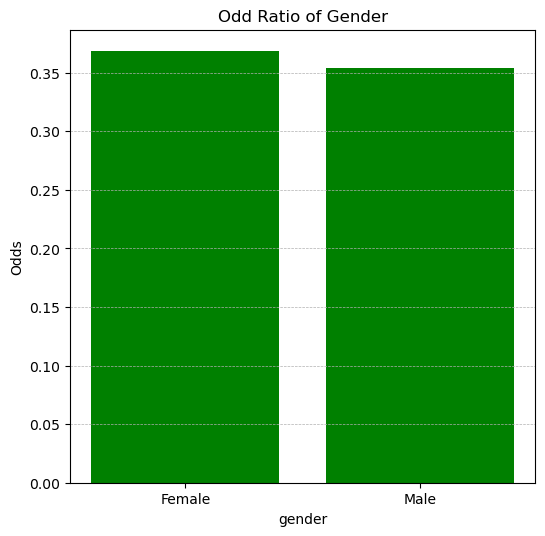

In [1066]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of Gender')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Gender Odd Ratio: The probability of female churn is slightly higher than male. However, since both gender odd ratio is less than 1, it means there is a lesser likelihood of having the churn outcome.

## MultipleLines

When the value of Phone Service is “No”, the value of Multiplelines shows “No Phone Service.” The “No Phone Service” value in the Multiplelines column actually does not have any predicting power. Merge "No Phone Service" into "No".

In [1067]:
trainData['MultipleLines'] = trainData['MultipleLines'].replace('No phone service', 'No')
trainData['MultipleLines']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042     No
Name: MultipleLines, Length: 7043, dtype: object

In [1068]:
pred = 'MultipleLines'

In [1069]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042     No
Name: MultipleLines, Length: 7043, dtype: category
Categories (2, object): ['Yes', 'No']

In [1070]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
MultipleLines,,
Yes,2121,850
No,3053,1019


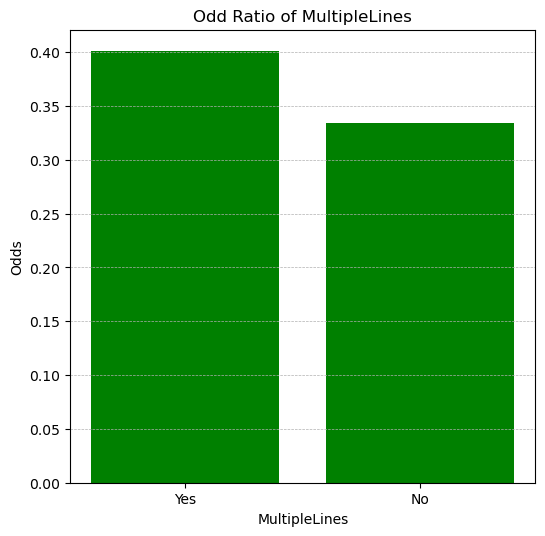

In [1071]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of MultipleLines')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

MultipleLines Odd Ratio: The probability of Having multiple lines user to churn is slightly higher than those do not have. However, since both MultipleLines odd ratio are less than 1, it means there is a lesser likelihood of having the churn outcome.

## SeniorCitizen

In [1073]:
pred = 'SeniorCitizen'
pred

'SeniorCitizen'

In [1074]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: category
Categories (2, int64): [1, 0]

In [1075]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
SeniorCitizen,,
1,666,476
0,4508,1393


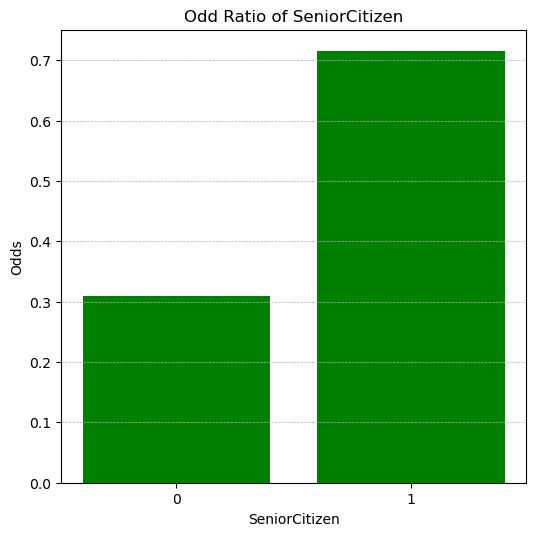

In [1076]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of SeniorCitizen')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Senior Citizen Odd Ratio: The probability of Senior Citizen to churn is higher than those were not. However, since both attribute odd ratio are less than 1, it means there is a lesser likelihood of having the churn outcome.

## Partner

In [1077]:
pred = 'Partner'
pred

'Partner'

In [1078]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: category
Categories (2, object): ['Yes', 'No']

In [1079]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
Partner,,
Yes,2733,669
No,2441,1200


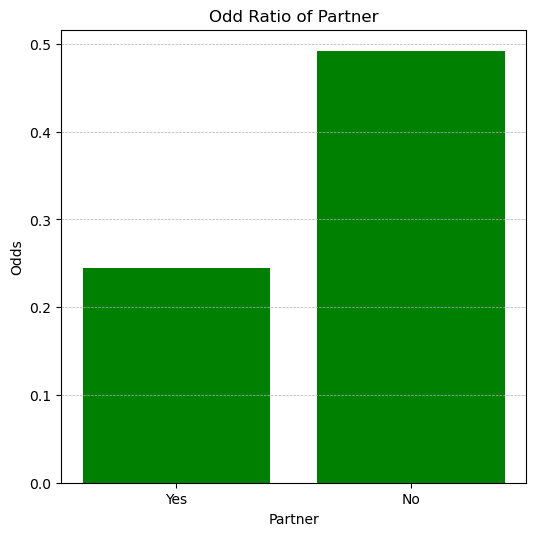

In [1080]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of Partner')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Partner Odd Ratio: The probability of No Partner to churn is higher than those who have one. However, since both attributes odd ratio are less than 1, it means there is a lesser likelihood of having the churn outcome.

## Dependents

In [1081]:
pred = 'Dependents'
pred

'Dependents'

In [1082]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: category
Categories (2, object): ['Yes', 'No']

In [1083]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
Dependents,,
Yes,1784,326
No,3390,1543


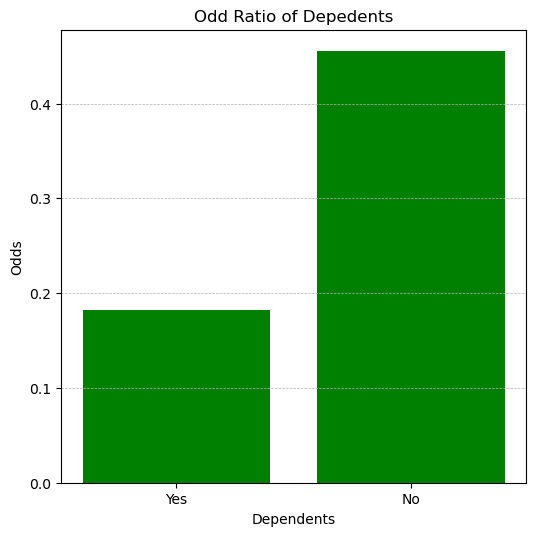

In [1084]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of Depedents')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Depedents Odd Ratio: The probability of No Depedents to churn is higher than those who have one. However, since both attribute odd ratios are less than 1, it means there is a lesser likelihood of having the churn outcome.

## PhoneService

In [1085]:
pred = 'PhoneService'
pred

'PhoneService'

In [1086]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

In [1087]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
PhoneService,,
No,512,170
Yes,4662,1699


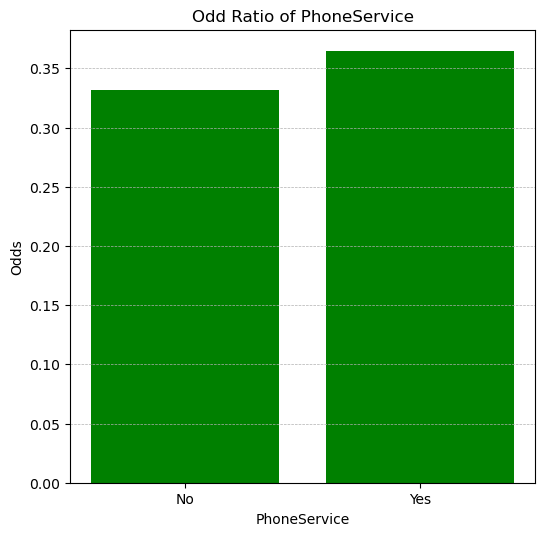

In [1088]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of PhoneService')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Phone Service Odd Ratio: The probability of having Phone Service to churn is slightly higher than those who don't have one. However, since both attribute odd ratios are less than 1, it means there is a lesser likelihood of having the churn outcome.

## Contract

In [1089]:
pred = 'Contract'
pred

'Contract'

In [1090]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
term_Contract = pd.get_dummies(trainData[pred])

In [1091]:
term_Contract

,One year,Two year,Month-to-month
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
7038,1,0,0
7039,1,0,0
7040,0,0,1
7041,0,0,1


In [1092]:
term_Contract['One year'] = term_Contract['One year'].astype('category').copy()
term_Contract['Two year'] = term_Contract['Two year'].astype('category').copy()
term_Contract['Month-to-month'] = term_Contract['Month-to-month'].astype('category').copy()

### One Year Contract

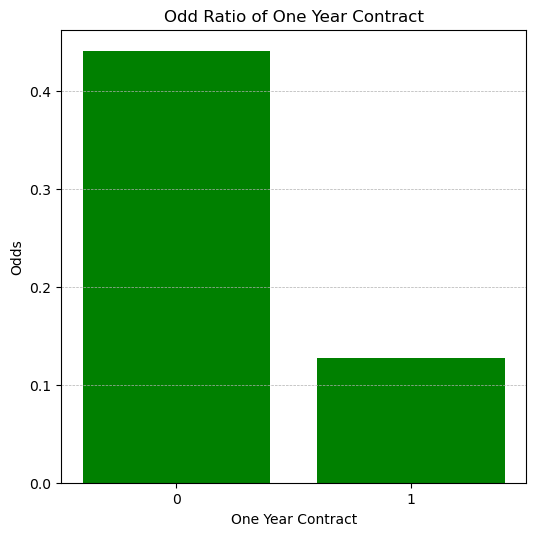

In [1093]:
cntTable1 = pandas.crosstab(index = term_Contract['One year'], columns = Telco.y,margins = False, dropna = True)
cntTable1

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable1 = cntTable1[1] / cntTable1[0]
ax1.bar(oddsTable1.index, oddsTable1, color = 'green')
ax1.set_xlabel('One Year Contract')
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable1.index)
ax1.set_title('Odd Ratio of One Year Contract')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Users are not in one year contract is more likely to churn than those who are. 

### Two year contract

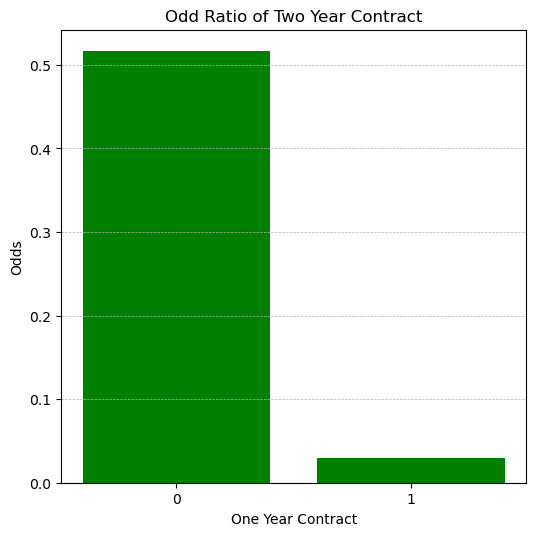

In [1094]:
cntTable2 = pandas.crosstab(index = term_Contract['Two year'], columns = Telco.y,margins = False, dropna = True)
cntTable2

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable2 = cntTable2[1] / cntTable2[0]
ax1.bar(oddsTable2.index, oddsTable2, color = 'green')
ax1.set_xlabel('One Year Contract')
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable2.index)
ax1.set_title('Odd Ratio of Two Year Contract')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Users are not in two year contract is much more likely to churn than those who are. In constract, users who signed two year contract are less likely to leave.

### Month to Month Contract

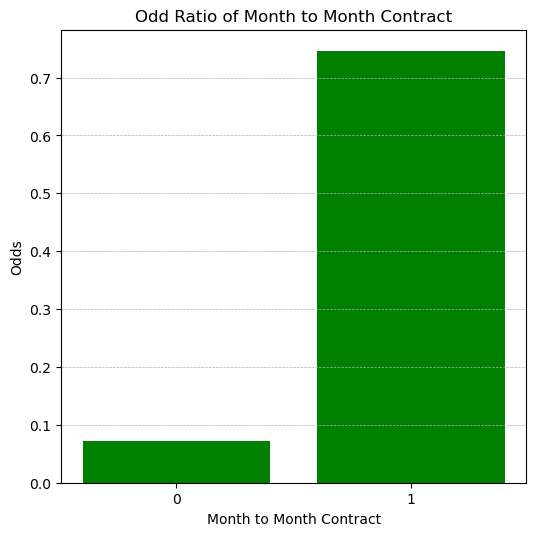

In [1095]:
cntTable3 = pandas.crosstab(index = term_Contract['Month-to-month'], columns = Telco.y,margins = False, dropna = True)
cntTable3

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable3 = cntTable3[1] / cntTable3[0]
ax1.bar(oddsTable3.index, oddsTable3, color = 'green')
ax1.set_xlabel('Month to Month Contract')
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable3.index)
ax1.set_title('Odd Ratio of Month to Month Contract')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Unlike the previous subscription, users who are in monthly contract is much more likely to churn than those who are not.

## PaperlessBilling

In [1096]:
pred = 'PaperlessBilling'
pred

'PaperlessBilling'

In [1097]:
u = trainData[pred].astype('category').copy()
u_freq = u.value_counts(ascending = True)
trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()
trainData[pred]

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

In [1098]:
cntTable = pandas.crosstab(index = trainData[pred], columns = Telco.y,margins = False, dropna = True)
cntTable

col_0,0,1
PaperlessBilling,,
No,2403,469
Yes,2771,1400


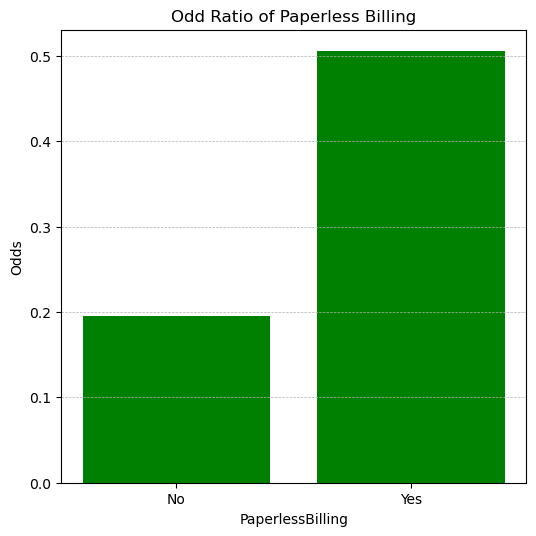

In [1099]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, dpi = 100, figsize = 
(6,6))

oddsTable = cntTable[1] / cntTable[0]
ax1.bar(oddsTable.index, oddsTable, color = 'green')
ax1.set_xlabel(pred)
ax1.set_ylabel('Odds')
ax1.set_xticks(oddsTable.index)
ax1.set_title('Odd Ratio of Paperless Billing')
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

Paperlessbilling subscriber is more likely to churn than those who did not sign up for paperless biling.

## Categorical Variable Summary:
According to the observation, predictors like Gender, phone services do not vary much in the odd ratio. In other word, they might not have too much predicting power to target variable. In constrast, predictors like Senior citizen partner, dependents, and different contact type varies  lot between attributes. 

# Question 1 b)

For each interval predictor, generate a grouped boxplot that shows the distribution of the interval predictor.  The grouping variable, in this case, is the target variable.  Also, please comment on each interval predictor on whether it may affect the target variable.

In [1100]:
import seaborn as sns


In [1101]:
trainData['TotalCharges'] = trainData['TotalCharges'].replace(r'^\s+$', 0, regex=True)

In [1102]:
trainData['TotalCharges'] = pd.to_numeric(trainData['TotalCharges'])

In [1103]:
trainData['TotalCharges'] = trainData['TotalCharges'].astype('int')

MonthlyCharges


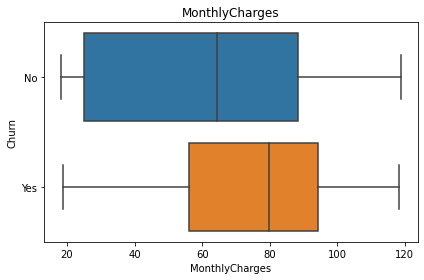

TotalCharges


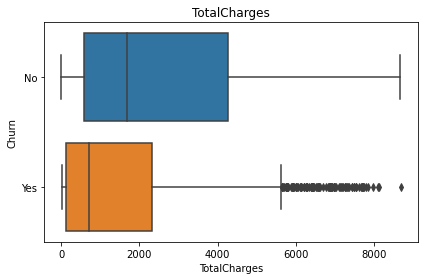

tenure


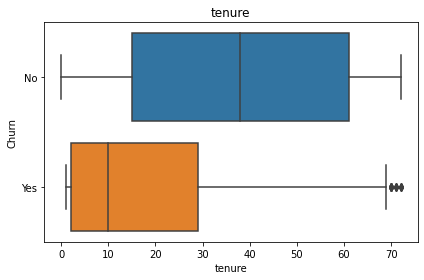

In [1104]:
for col in X_cont:
    print(col)
    sns.boxplot(data=trainData, x=col, y='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

Monthly charge varies between Churn yes and no. However, it is slightly higher in churn customer.
Total charges is interesting to look at. Churn customer has lower medium however a lot of outliers. 
In Tenure, churn customer has lower medium but a few outliers. 

# Question 2 a)

Enter the predictors into your model using Forward Selection.  The Entry Threshold is 0.001.

a)	Please provide a summary report of the Forward Selection. The report should include (1) the step number, (2) the predictor entered, (3) the number of non-aliased parameters in the current model, (4) the log-likelihood value of the current model, (5) the Deviance Chi-squares statistic between the current and the previous models, (6) the corresponding Deviance Degree of Freedom, and (7) the corresponding Chi-square significance.

In [1105]:
trainData.y = trainData.iloc[:,0]

<ipython-input-1105-9e706edd65e3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trainData.y = trainData.iloc[:,0]


In [1106]:
trainData.y = pd.Series(np.where(trainData.y.values == 'Yes', 1, 0),
          trainData.y.index)

In [1107]:
for pred in X_cat:
    u = trainData[pred].astype('category').copy()
    u_freq = u.value_counts(ascending = True)
    trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()

In [1108]:
# Generate a column of Intercept
X0_train = trainData[['Churn']].copy()
X0_train.insert(0, 'Intercept', 1.0)
X0_train.drop(columns = ['Churn'], inplace = True)
y_train = trainData.y.copy()

In [1109]:
maxIter = 20
tolS = 1e-7
stepSummary = pandas.DataFrame()

In [1110]:
# Intercept only model
resultList_intercept = Regression.BLogisticModel (X0_train, y_train, offset = None, maxIter =
maxIter, tolSweep = tolS)
llk0 = resultList_intercept[3]
df0 = len(resultList_intercept[4])
stepSummary = stepSummary.append([['Intercept', ' ', df0, llk0, numpy.NaN, 
numpy.NaN, numpy.NaN]], ignore_index = True)
stepSummary.columns = ['Predictor', 'Type', 'ModelDF', 'ModelLLK', 'DevChiSq', 
'DevDF', 'DevSig']

In [1111]:
resultList_intercept[3]

-4075.072949509806

In [1112]:
print('======= Step Detail =======')
print('Step = ', 0)
print('Step Statistics:')
print(stepSummary)

======= Step Detail =======
Step =  0
Step Statistics:
   Predictor Type  ModelDF   ModelLLK  DevChiSq  DevDF  DevSig
0  Intercept             1 -4.075e+03       NaN    NaN     NaN


In [1113]:
cName = X_cat.copy()
iName = X_cont.copy()
entryThreshold = 0.001

In [1114]:
nPredictor = len(X_cat) + len(X_cont)

In [1115]:
for step in range(nPredictor):
    enterName = ''
    stepDetail = pandas.DataFrame()
    # Enter the next predictor
    for X_name in cName:
        X_train = pandas.get_dummies(trainData[[X_name]])
        X_train = X0_train.join(X_train)
        resultList = Regression.BLogisticModel (X_train, y_train, offset = None, 
maxIter = maxIter, tolSweep = tolS)
        llk1 = resultList[3]
        df1 = len(resultList[4])
        devChiSq = 2.0 * (llk1 - llk0)
        devDF = df1 - df0
        devSig = chi2.sf(devChiSq, devDF)
        stepDetail = stepDetail.append([[X_name, 'categorical', df1, llk1, 
devChiSq, devDF, devSig]], ignore_index = True)
    for X_name in iName:
        X_train = trainData[[X_name]]
        X_train = X0_train.join(X_train)
        resultList = Regression.BLogisticModel (X_train, y_train, offset = None, 
maxIter = maxIter, tolSweep = tolS)
        llk1 = resultList[3]
        df1 = len(resultList[4])
        devChiSq = 2.0 * (llk1 - llk0)
        devDF = df1 - df0
        devSig = chi2.sf(devChiSq, devDF)
        stepDetail = stepDetail.append([[X_name, 'interval', df1, llk1, devChiSq, 
devDF, devSig]], ignore_index = True)
    stepDetail.columns = ['Predictor', 'Type', 'ModelDF', 'ModelLLK', 'DevChiSq', 
'DevDF', 'DevSig']
    # Find a predictor to enter, if any
    stepDetail.sort_values(by = 'DevSig', axis = 0, ascending = True, inplace = 
True)
    enterRow = stepDetail.iloc[0].copy()
    minPValue = enterRow['DevSig']
    if (minPValue <= entryThreshold):
        stepSummary = stepSummary.append([enterRow], ignore_index = True)
        df0 = enterRow['ModelDF']
        llk0 = enterRow['ModelLLK']
        enterName = enterRow['Predictor']
        enterType = enterRow['Type']
        if (enterType == 'categorical'):
            X_train = pandas.get_dummies(trainData[[enterName]].astype('category'))
            X0_train = X0_train.join(X_train)
            cName.remove(enterName)
        elif (enterType == 'interval'):
            X_train = trainData[[enterName]]
            X0_train = X0_train.join(X_train)
            iName.remove(enterName)
    else:
        break

In [1119]:
# Print debugging output
print('======= Step Detail =======')
print('Step = ', step+1)
print('Step Statistics:')
print(stepDetail)
print('Enter predictor = ', enterName)
print('Minimum P-Value =', minPValue)
print('\n')

======= Step Detail =======
Step =  8
Step Statistics:
       Predictor         Type  ModelDF   ModelLLK  DevChiSq  DevDF   DevSig
3  MultipleLines  categorical       10 -2.999e+03     7.745      1 0.005387
2     Dependents  categorical       10 -2.999e+03     6.818      1 0.009024
1        Partner  categorical       10 -3.002e+03    0.7764      1   0.3783
0         gender  categorical       10 -3.002e+03   0.02045      1   0.8863
Enter predictor =  
Minimum P-Value = 0.005387031160130798




In [1120]:
# End of forward selection
print('======= Step Summary =======')
print(stepSummary)

======= Step Summary =======
          Predictor         Type  ModelDF   ModelLLK  DevChiSq  DevDF     DevSig
0         Intercept                     1 -4.075e+03       NaN    NaN        NaN
1          Contract  categorical        3 -3.382e+03 1.387e+03    2.0 7.213e-302
2    MonthlyCharges     interval        4 -3.242e+03     279.3    1.0  1.069e-62
3            tenure     interval        5 -3.073e+03     338.2    1.0  1.603e-75
4      PhoneService  categorical        6 -3.042e+03     62.36    1.0  2.855e-15
5  PaperlessBilling  categorical        7 -3.022e+03     39.53    1.0  3.238e-10
6     SeniorCitizen  categorical        8  -3.01e+03     23.94    1.0  9.926e-07
7      TotalCharges     interval        9 -3.002e+03      15.2    1.0  9.664e-05


# Question 2 b)

Please show a table of the complete set of parameters of your final model (including the aliased parameters).  Besides the parameter estimates, please also include the standard errors, and the 95% asymptotic confidence intervals.  Conventionally, aliased parameters have missing standard errors and confidence intervals.).

In [1121]:
# Final model
resultList = Regression.BLogisticModel (X0_train, y_train, offset = None, maxIter =
maxIter, tolSweep = tolS)

In [1122]:
resultList[0]

,Estimate,Standard Error,Lower 95% CI,Upper 95% CI
Intercept,-1.33,0.1408,-1.606,-1.054
Contract_One year,-0.9563,0.1029,-1.158,-0.7547
Contract_Two year,-1.901,0.1702,-2.234,-1.567
Contract_Month-to-month,0.0,0.0,0.0,0.0
MonthlyCharges,0.0252,0.001939,0.0214,0.029
tenure,-0.06052,0.006038,-0.07235,-0.04869
PhoneService_No,0.8946,0.1203,0.6589,1.13
PhoneService_Yes,0.0,0.0,0.0,0.0
PaperlessBilling_No,-0.4379,0.07237,-0.5798,-0.2961
PaperlessBilling_Yes,0.0,0.0,0.0,0.0


aliased parameters: Contract_Month to month, Multipleline_Yes,  ParperlessBilling_Yes, and SeniorCitizen_No

# Question 3

## a. Please calculate the McFadden’s R-squared, the Cox-Snell’s R-squared, the Nagelkerke’s R-squared, and the Tjur’s Coefficient of Discrimination.

In [1123]:
ModelLLK0 = resultList_intercept[3]
ModelLLK07 = llk1

In [702]:
R_MF = 1.0 - (ModelLLK07 /ModelLLK0 )
n_sample = trainData.shape[0]
R_CS = numpy.exp(ModelLLK0 - ModelLLK07 )
R_CS = 1.0 - numpy.power(R_CS, (2.0 / n_sample))
upbound = 1.0 - numpy.power(numpy.exp(resultList_intercept[3]), (2.0 / n_sample))
R_N = R_CS / upbound
predprob_event = resultList[6][1]
S1 = numpy.mean(predprob_event[trainData.y==1])
S0 = numpy.mean(predprob_event[trainData.y==0])
R_TJ= S1 - S0


0.2641727638936914

In [1126]:
print ( "R_MF = ",R_MF, "\n", "R_CS = ",R_CS,"\n", "R_N = ",R_N, "\n", "R_TJ=",R_TJ)

R_MF =  0.2641727638936914 
 R_CS =  1.0 
 R_N =  1.0 
 R_TJ= 0.28210455199673856


## Please calculate the Area Under Curve statistic and the Root Average Squared Error.

In [749]:
def binary_model_metric (target, valueEvent, valueNonEvent, predProbEvent, 
eventProbThreshold = 0.5):
   '''Calculate metrics for a binary classification model
   Parameter
   ---------
   target: Panda Series that contains values of target variable
   valueEvent: Formatted value of target variable that indicates an event
   valueNonEvent: Formatted value of target variable that indicates a non-event
   predProbEvent: Panda Series that contains predicted probability that the event 
will occur
   eventProbThreshold: Threshold for event probability to indicate a success
   Return
   ------
   outSeries: Pandas Series that contain the following statistics
              ASE: Average Squared Error
              RASE: Root Average Squared Error
              MCE: Misclassification Rate
              AUC: Area Under Curve
   '''
   # Number of observations
   nObs = len(target)
   # Aggregate observations by the target values and the predicted probabilities
   aggrProb = pandas.crosstab(predProbEvent, target, dropna = True)
   # Calculate the root average square error
   ase = (numpy.sum(aggrProb[valueEvent] * (1.0 - aggrProb.index)**2) +
          numpy.sum(aggrProb[valueNonEvent] * (0.0 - aggrProb.index)**2)) / nObs
   if (ase > 0.0):
      rase = numpy.sqrt(ase)
   else:
      rase = 0.0
   # Calculate the misclassification error rate
   nFP = numpy.sum(aggrProb[valueEvent].iloc[aggrProb.index < eventProbThreshold])
   nFN = numpy.sum(aggrProb[valueNonEvent].iloc[aggrProb.index >= eventProbThreshold])
   mce = (nFP + nFN) / nObs
   # Calculate the number of concordant, discordant, and tied pairs
   nConcordant = 0.0
   nDiscordant = 0.0
   nTied = 0.0
   # Loop over the predicted event probabilities from the Event column
   predEP = aggrProb.index
   eventFreq = aggrProb[valueEvent]
   for i in range(len(predEP)):
      eProb = predEP[i]
      eFreq = eventFreq.loc[eProb]
      if (eFreq > 0.0):
         nConcordant = nConcordant + numpy.sum(eFreq * 
aggrProb[valueNonEvent].iloc[eProb > aggrProb.index])
         nDiscordant = nDiscordant + numpy.sum(eFreq * 
aggrProb[valueNonEvent].iloc[eProb < aggrProb.index])
         nTied = nTied + numpy.sum(eFreq * aggrProb[valueNonEvent].iloc[eProb == 
aggrProb.index])
   auc = 0.5 + 0.5 * (nConcordant - nDiscordant) / (nConcordant + nDiscordant + 
nTied)
   outSeries = pandas.Series({'ASE': ase, 'RASE': rase, 'MCE': mce, 'AUC': auc})
   return(outSeries)

In [942]:
outSeries = binary_model_metric (trainData.y, 1, 0, predprob_event, eventProbThreshold = 0.5)
print(round(outSeries,4))

ASE    0.1391
RASE   0.3729
MCE    0.2015
AUC    0.8378
dtype: float64


## According to the F1 Score, please suggest the probability threshold for Churn.  Using this threshold, what is the misclassification rate?

In [1050]:
NoskillLine = numpy.sum(trainData.y)/nObs
NoskillLine

0.2653698707936959

In [905]:
thredhold = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [1034]:
for i in thredhold:    
    nFP = numpy.sum((aggrProb[1]).iloc[aggrProb.index < i])
    nFN = numpy.sum((aggrProb[0]).iloc[aggrProb.index >= i])
    nTP = numpy.sum((aggrProb).iloc[aggrProb.index >= i])
    nTN = numpy.sum((aggrProb).iloc[aggrProb.index < i])
    precision= nTP/(nFP+nTP)
    recall = nTP/(nFN + nTP)
    F1score= 1 / ((1 / precision + 1 / recall) / 2)
    output = pandas.Series({'precision': precision[1], 'recall': recall[1], 'F1score': F1score[1]})
    print(i,output)

0.2 precision   0.8796
recall      0.4579
F1score     0.6023
dtype: float64
0.3 precision   0.7747
recall      0.5142
F1score     0.6181
dtype: float64
0.4 precision   0.6715
recall      0.5692
F1score     0.6161
dtype: float64
0.5 precision   0.5233
recall      0.6494
F1score     0.5796
dtype: float64
0.6 precision    0.321
recall      0.7282
F1score     0.4456
dtype: float64
0.7 precision    0.114
recall      0.8161
F1score        0.2
dtype: float64
0.8 precision   0.01124
recall        0.875
F1score     0.02219
dtype: float64
0.9 precision   0.0
recall      NaN
F1score     NaN
dtype: float64
1 precision   0.0
recall      NaN
F1score     NaN
dtype: float64


In [1032]:
thredhold = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
F1score = [0.60,0.618,0.616,0.58,0.44,0.2,0.02,0,0]
F1_th = {'thredhold':thredhold,'F1score':F1score}

<AxesSubplot:xlabel='thredhold', ylabel='F1score'>

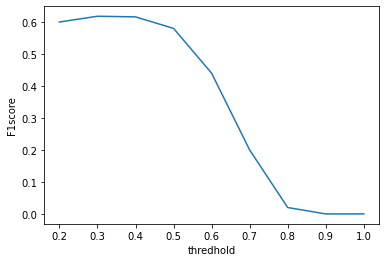

In [1033]:
sns.lineplot(data = F1_th,x='thredhold',y='F1score') 

In [1052]:
nFP = numpy.sum(aggrProb[1].iloc[aggrProb.index < 0.4])
nFN = numpy.sum(aggrProb[0].iloc[aggrProb.index >= 0.4])
nObs = len(trainData.y)
mce = (nFP + nFN) / nObs
print ("Misclassification Rate at 0.4: ",mce)

Misclassification Rate at 0.4:  0.22206446116711628


### Finding: 
The F1 Score attains its maximum when the threshold is 0.4.
With this threshold, the Sensitivity is 0.57
and the 1 – Specificity is 0.40.
The False Positive Rate is 40% and the
True Positive Rate is 57%.
With this threshold, the Misclassification Rate is 3/11 = 0.22

This model is good before p = 0.7 when points are above the No-Skill Line.